In [1]:
# Regresja liniowa na realnym zbiorze danych (diabetes) dla jednowymiarowego X z trzema wartosciami odstajacymi

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
url = "https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"
df = pd.read_csv(url, sep='\t')
df[1:10]

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
1,48,1,21.6,87.0,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.00,4.2905,80,135
5,23,1,22.6,89.0,139,64.8,61.0,2.00,4.1897,68,97
6,36,2,22.0,90.0,160,99.6,50.0,3.00,3.9512,82,138
7,66,2,26.2,114.0,255,185.0,56.0,4.55,4.2485,92,63
8,60,2,32.1,83.0,179,119.4,42.0,4.00,4.4773,94,110
9,29,1,30.0,85.0,180,93.4,43.0,4.00,5.3845,88,310


In [4]:
print(df.shape)

(442, 11)


In [5]:
# Dodanie wartosci odstajacych
df.loc[1] = [1,-1,100,1000,1,-1,1,1,1000,1,-1]
df.loc[2] = [1,1,1,-1000,1,1,1,1000,1,1,-1]
df.loc[3] = [1,-1,1,2000,1,-1000,1,1,1,-1,1]
df[1:10]

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
1,1,-1,100.0,1000.0,1,-1.0,1.0,1.00,1000.0000,1,-1
2,1,1,1.0,-1000.0,1,1.0,1.0,1000.00,1.0000,1,-1
3,1,-1,1.0,2000.0,1,-1000.0,1.0,1.00,1.0000,-1,1
4,50,1,23.0,101.0,192,125.4,52.0,4.00,4.2905,80,135
5,23,1,22.6,89.0,139,64.8,61.0,2.00,4.1897,68,97
6,36,2,22.0,90.0,160,99.6,50.0,3.00,3.9512,82,138
7,66,2,26.2,114.0,255,185.0,56.0,4.55,4.2485,92,63
8,60,2,32.1,83.0,179,119.4,42.0,4.00,4.4773,94,110
9,29,1,30.0,85.0,180,93.4,43.0,4.00,5.3845,88,310


In [6]:
print(df.shape)

(442, 11)


In [7]:
# Jednowymiarowe X

In [8]:
# Tylko jedna cecha - BMI
x = df.iloc[:,2].values.reshape(-1, 1)
y = df.iloc[:,10]

In [9]:
x_train = x[:-20]
x_test = x[-20:]
y_train = y[:-20]
y_test = y[-20:]

In [10]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

In [11]:
y_pred = regr.predict(x_test)

In [12]:
print('Coefficients: \n', regr.coef_)
print('MAE: %.2f' % mean_absolute_error(y_test, y_pred))
print('MSE: %.2f' % mean_squared_error(y_test, y_pred))
print('RMSE: %.2f' % math.sqrt(mean_squared_error(y_test, y_pred)))

Coefficients: 
 [5.33140613]
MAE: 50.88
MSE: 3433.00
RMSE: 58.59


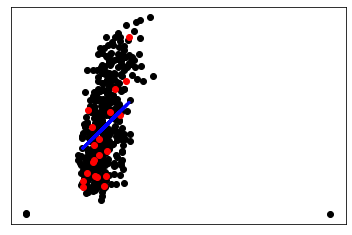

In [14]:
plt.scatter(x_train, y_train, color='black')
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()